
<h2 id="I. Data Preparation">I. Data Preparation</h2>


<h3 id="1. Load Time Series Data">1. Load Time Series Data</h3>

In [179]:
#! pip install --upgrade pip

In [180]:
#! pip install seaborn

In [225]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
plt.style.use("fivethirtyeight")

In [226]:
series = pd.read_csv('data_filter.csv')

In [227]:
series

,date,code,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
0,12/3/2021,FUESSV50,15:12:06,HOSE,ETF,23.40,25.03,21.77,23.48,25.03,...,24.470,31800,7.781320e+08,0,0.000000e+00,-0.30,-0.3000,-1.2821,12/3/2021,Tài chính
1,12/3/2021,FUCVREIT,15:12:06,HOSE,IFC,11.85,12.65,11.05,11.65,11.90,...,11.790,20200,2.382450e+08,0,0.000000e+00,-0.25,-0.2500,-2.1097,12/3/2021,Tài chính
2,12/1/2021,HCM,15:12:03,HOSE,STOCK,49.00,52.40,45.60,48.80,49.10,...,47.777,6345900,3.066480e+11,0,0.000000e+00,-0.75,-0.7416,-1.5306,12/1/2021,Tài chính
3,12/1/2021,E1VFVN30,15:12:03,HOSE,ETF,25.80,27.60,24.00,25.80,26.20,...,25.850,1079300,2.789960e+10,1900000,4.918350e+10,0.40,0.4000,1.5504,12/1/2021,Tài chính
4,12/1/2021,FUCTVGF3,15:12:03,HOSE,IFC,12.00,12.80,11.20,12.00,12.00,...,0.000,0,0.000000e+00,0,0.000000e+00,0.00,0.0000,0.0000,12/1/2021,Tài chính
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,12/28/2017,FUCVREIT,15:12:01,HOSE,IFC,8.98,9.60,8.36,9.00,9.49,...,6.923,3810,3.433220e+07,0,0.000000e+00,0.02,0.0154,0.2227,12/28/2017,Tài chính
4799,11/14/2017,FUCVREIT,15:11:02,HOSE,IFC,10.25,10.95,9.54,10.80,10.80,...,8.298,10,1.080000e+05,0,0.000000e+00,0.55,0.4226,5.3659,11/14/2017,Tài chính
4800,11/14/2017,E1VFVN30,15:11:02,HOSE,ETF,14.22,15.21,13.23,14.23,14.43,...,14.350,196240,2.815477e+09,0,0.000000e+00,0.11,0.1100,0.7736,11/14/2017,Tài chính
4801,12/18/2017,E1VFVN30,15:12:02,HOSE,ETF,15.43,16.51,14.35,15.41,16.51,...,15.600,49510,7.724679e+08,1190000,1.821652e+10,0.28,0.2800,1.8146,12/18/2017,Tài chính


In [228]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4803 non-null   object 
 1   code            4803 non-null   object 
 2   time            4803 non-null   object 
 3   floor           4803 non-null   object 
 4   type            4803 non-null   object 
 5   basicPrice      4803 non-null   float64
 6   ceilingPrice    4803 non-null   float64
 7   floorPrice      4803 non-null   float64
 8   open            4803 non-null   float64
 9   high            4803 non-null   float64
 10  low             4803 non-null   float64
 11  close           4803 non-null   float64
 12  average         4803 non-null   float64
 13  adOpen          4803 non-null   float64
 14  adHigh          4803 non-null   float64
 15  adLow           4803 non-null   float64
 16  adClose         4803 non-null   float64
 17  adAverage       4803 non-null   f

<h2>II. Feature Engineering For Time Series</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Seasonal_and_nonseasonal_cycles">Seasonal_and_nonseasonal_cycles</a></li>
        <li><a href="https://#Trends">Trends</a></li>
        <li><a href="https://#Pulses_and_steps">Pulses and steps</a></li>
        <li><a href="https://#Outliers">Outliers</a></li>
    </ol>
</div>
<br>
<hr>


<h3 id="1. Seasonal_and_nonseasonal_cycles">1. Seasonal_and_nonseasonal_cycles</h3>

**Trend** is a pattern in data that shows the movement of a series to relatively higher or lower values over a long period of time. In other words, a trend is observed when there is an increasing or decreasing slope in the time series. Trend usually happens for some time and then disappears, it does not repeat. For example, some new song comes, it goes trending for a while, and then disappears. There is fairly any chance that it would be trending again.

A trend could be :

**Uptrend:** Time Series Analysis shows a general pattern that is upward then it is Uptrend.
**Downtrend:** Time Series Analysis shows a pattern that is downward then it is Downtrend.
**Horizontal or Stationary trend:** If no pattern observed then it is called a Horizontal or stationary trend.

In [229]:
#! pip install matplotlib


In [230]:
import matplotlib as plt


In [231]:
series.columns

Index(['date', 'code', 'time', 'floor', 'type', 'basicPrice', 'ceilingPrice',
       'floorPrice', 'open', 'high', 'low', 'close', 'average', 'adOpen',
       'adHigh', 'adLow', 'adClose', 'adAverage', 'nmVolume', 'nmValue',
       'ptVolume', 'ptValue', 'change', 'adChange', 'pctChange',
       'snapshot_date', 'vietnameseName'],
      dtype='object')

In [232]:
series_1=series.drop(columns=[ 'time', 'type', 'basicPrice', 'ceilingPrice','floorPrice', 'adOpen','adHigh', 'adLow', 'adClose', 'adAverage', 'nmVolume', 'nmValue','ptVolume', 'ptValue', 'change', 'adChange', 'pctChange','snapshot_date', 'vietnameseName'])

In [233]:
series_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     4803 non-null   object 
 1   code     4803 non-null   object 
 2   floor    4803 non-null   object 
 3   open     4803 non-null   float64
 4   high     4803 non-null   float64
 5   low      4803 non-null   float64
 6   close    4803 non-null   float64
 7   average  4803 non-null   float64
dtypes: float64(5), object(3)
memory usage: 300.3+ KB


In [234]:

import datetime as dt

In [235]:
series_1.head(5)

,date,code,floor,open,high,low,close,average
0,12/3/2021,FUESSV50,HOSE,23.48,25.03,23.10,23.10,24.47
1,12/3/2021,FUCVREIT,HOSE,11.65,11.90,11.60,11.60,11.79
2,12/1/2021,HCM,HOSE,48.80,49.10,47.50,48.25,48.32
3,12/1/2021,E1VFVN30,HOSE,25.80,26.20,25.75,26.20,25.85
4,12/1/2021,FUCTVGF3,HOSE,12.00,12.00,12.00,12.00,0.00


In [236]:
series_1.tail(5)

,date,code,floor,open,high,low,close,average
4798,12/28/2017,FUCVREIT,HOSE,9.00,9.49,8.99,9.00,9.01
4799,11/14/2017,FUCVREIT,HOSE,10.80,10.80,10.80,10.80,10.80
4800,11/14/2017,E1VFVN30,HOSE,14.23,14.43,14.23,14.33,14.35
4801,12/18/2017,E1VFVN30,HOSE,15.41,16.51,15.41,15.71,15.60
4802,12/29/2017,E1VFVN30,HOSE,16.05,16.22,15.99,16.18,16.14


In [237]:
# Convert to date time

In [238]:
series_1['Dates'] = pd.to_datetime(series_1['date']).dt.date
series_1['Month'] = pd.to_datetime(series_1['date']).dt.month
series_1['Year'] = pd.to_datetime(series_1['date']).dt.year


**Average closing price of the company E1VFVN30**


- Closing Price By Dates

In [254]:
series_FUESSV50 = series_1[series_1.code == "FUESSV50"]


AttributeError: module 'matplotlib' has no attribute 'title'

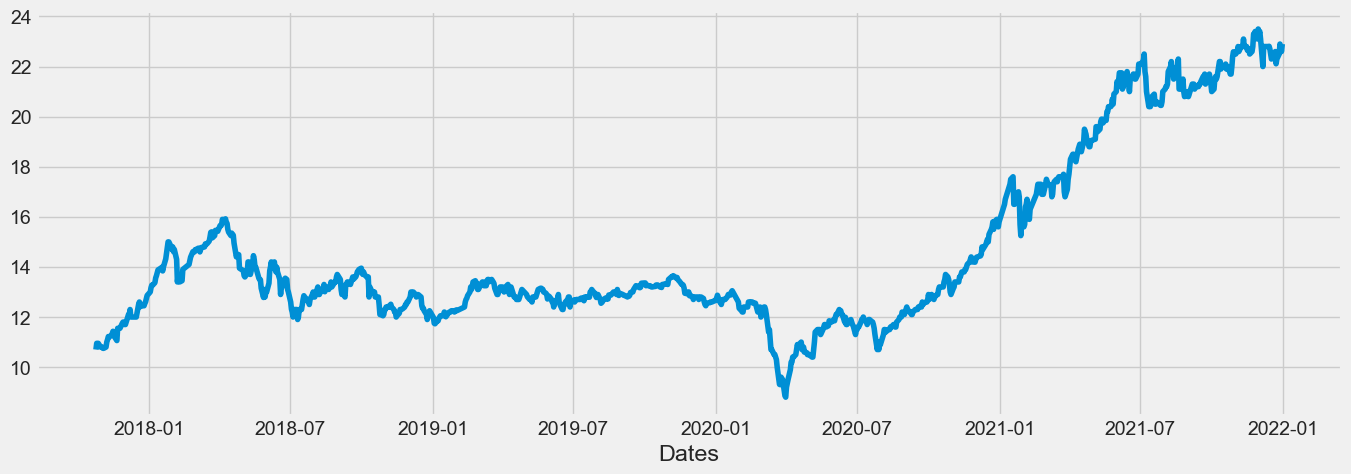

In [255]:
series_FUESSV50.groupby("Dates").mean()['close'].plot()
plt.title("The chart shows the average closing price by days ",fontsize=15)


-  Closing Price By Month

AttributeError: module 'matplotlib' has no attribute 'title'

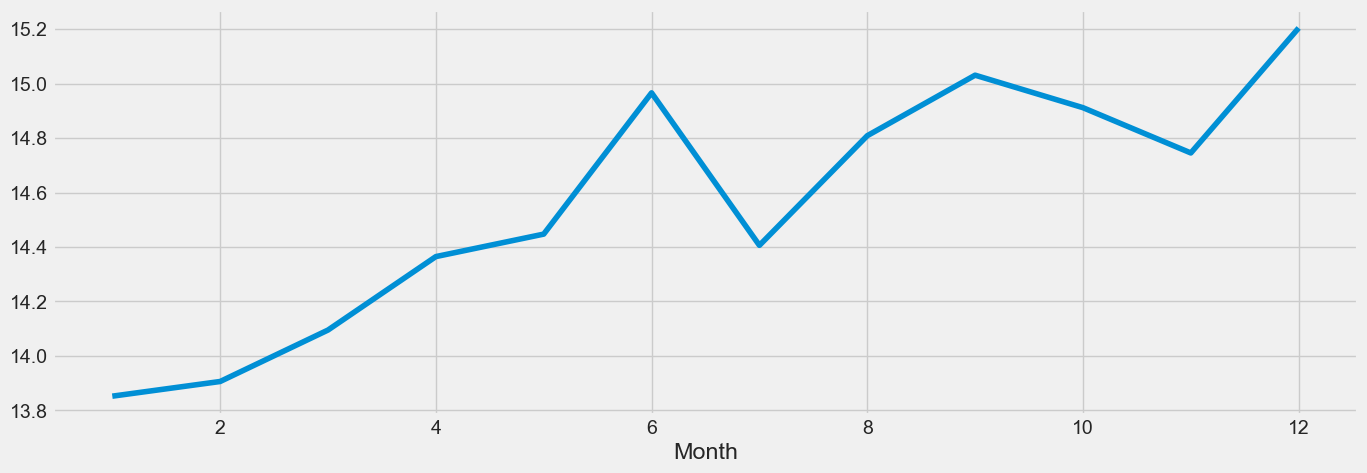

In [256]:

series_FUESSV50.groupby("Month").mean()['close'].plot()
plt.title("The chart shows the average closing price by month",fontsize=15)

- Closing Price By Year

AttributeError: module 'matplotlib' has no attribute 'title'

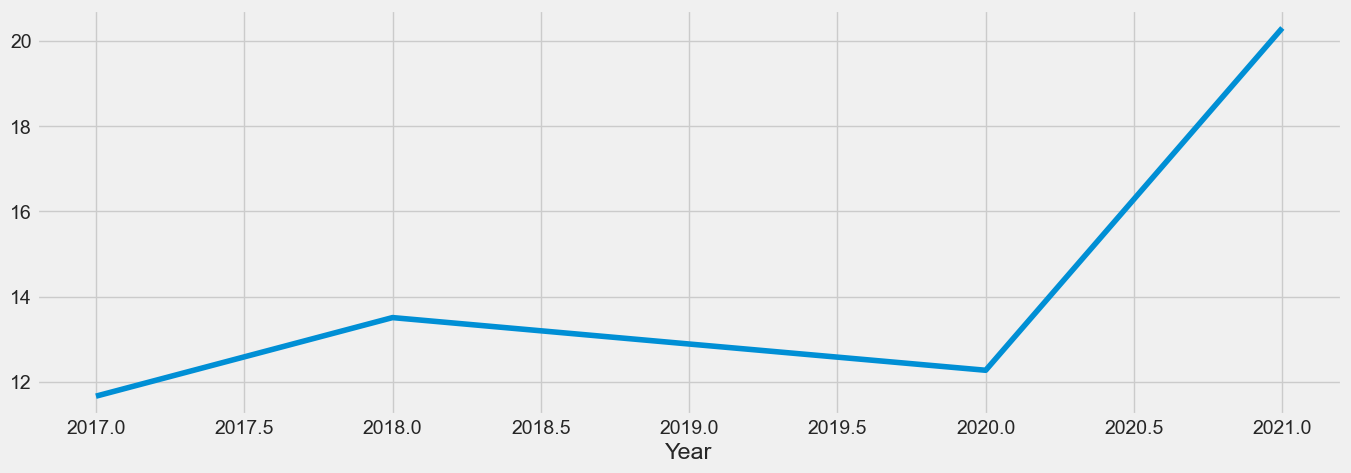

In [257]:
series_FUESSV50.groupby("Year").mean()['close'].plot()
plt.title("The chart shows the average closing price by year",fontsize=15)

**Average closing price of the company FUCVREIT**

- Closing Price By Days

In [200]:
series_FUCVREIT = series_1[series_1.code == "FUCVREIT"]

AttributeError: module 'matplotlib' has no attribute 'title'

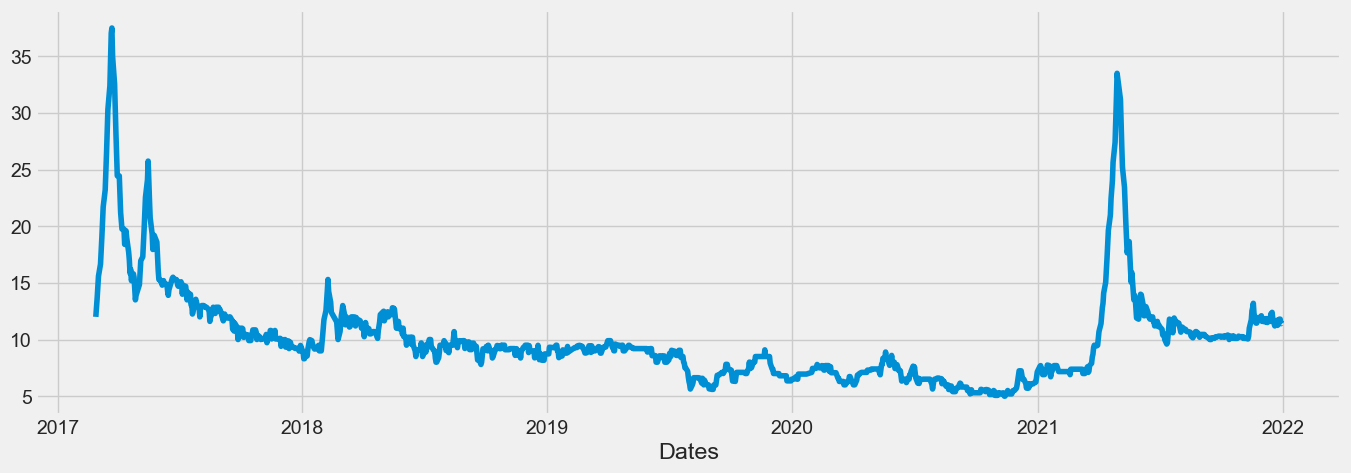

In [201]:
series_FUCVREIT.groupby("Dates").mean()['close'].plot()
plt.title("The chart shows the average closing price by days ",fontsize=15)


- Closing Price By Month

AttributeError: module 'matplotlib' has no attribute 'title'

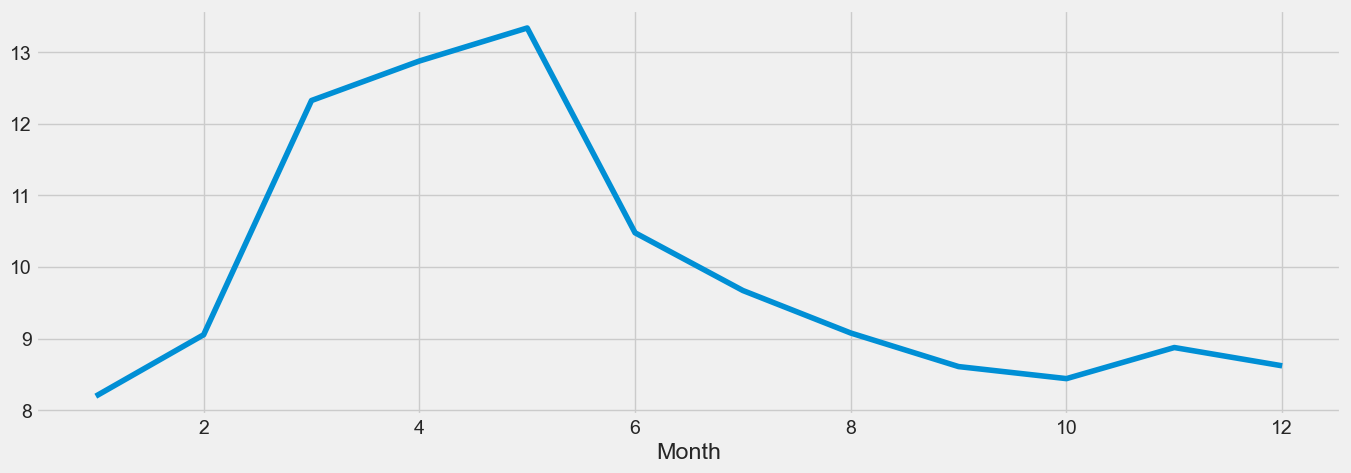

In [202]:
series_FUCVREIT.groupby("Month").mean()['close'].plot()
plt.title("The chart shows the average closing price by month",fontsize=15)

- Closing Price By Year

AttributeError: module 'matplotlib' has no attribute 'title'

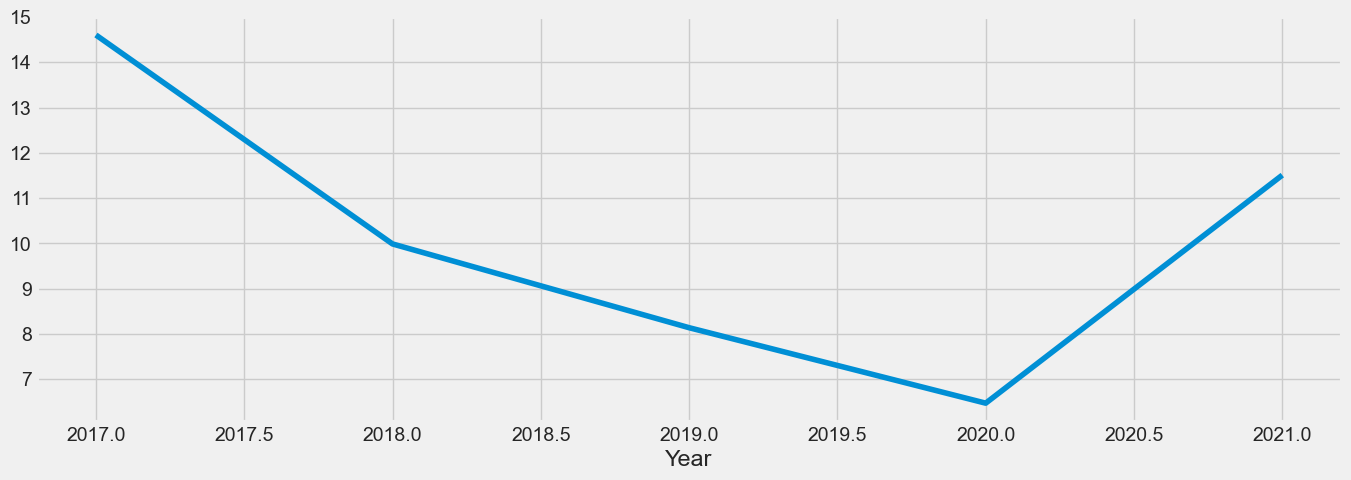

In [203]:
series_FUCVREIT.groupby("Year").mean()['close'].plot()
plt.title("The chart shows the average closing price by year",fontsize=15)

**Average closing price of the company HCM**

- Closing Price By Days

In [204]:
series_HCM = series_1[series_1.code == "HCM"]

AttributeError: module 'matplotlib' has no attribute 'title'

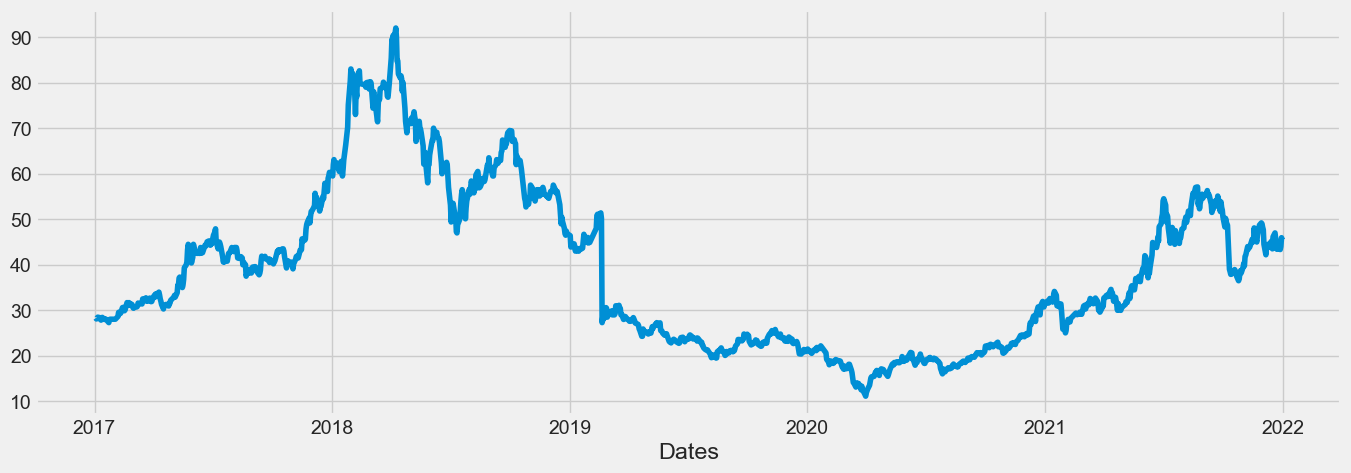

In [205]:
series_HCM.groupby("Dates").mean()['close'].plot()
plt.title("The chart shows the average closing price by days ",fontsize=15)

- Closing Price By Month

AttributeError: module 'matplotlib' has no attribute 'title'

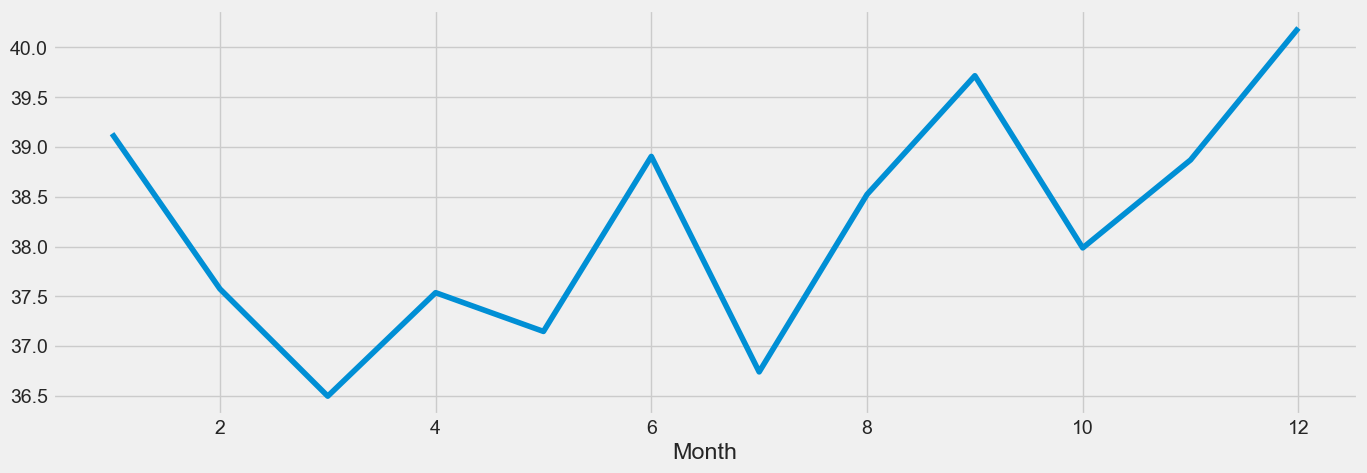

In [206]:
series_HCM.groupby("Month").mean()['close'].plot()
plt.title("The chart shows the average closing price by month ",fontsize=15)

- Closing Price By year

AttributeError: module 'matplotlib' has no attribute 'title'

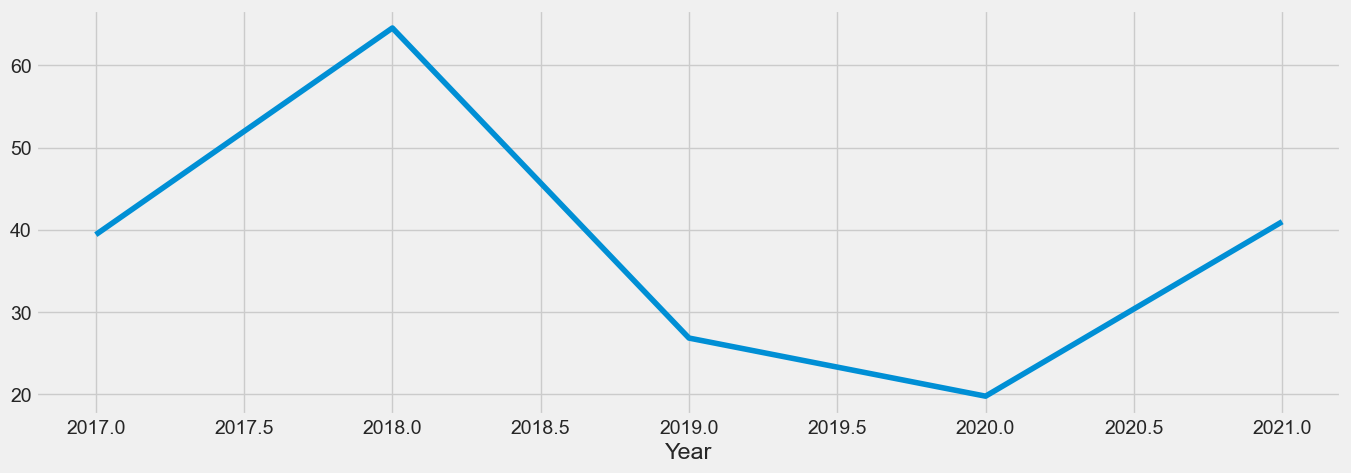

In [207]:
series_HCM.groupby("Year").mean()['close'].plot()
plt.title("The chart shows the average closing price by year",fontsize=15)

**Average closing price of the company E1VFVN30**

- Closing Price By Days

In [208]:
series_E1VFVN30 = series_1[series_1.code == "E1VFVN30"]

AttributeError: module 'matplotlib' has no attribute 'title'

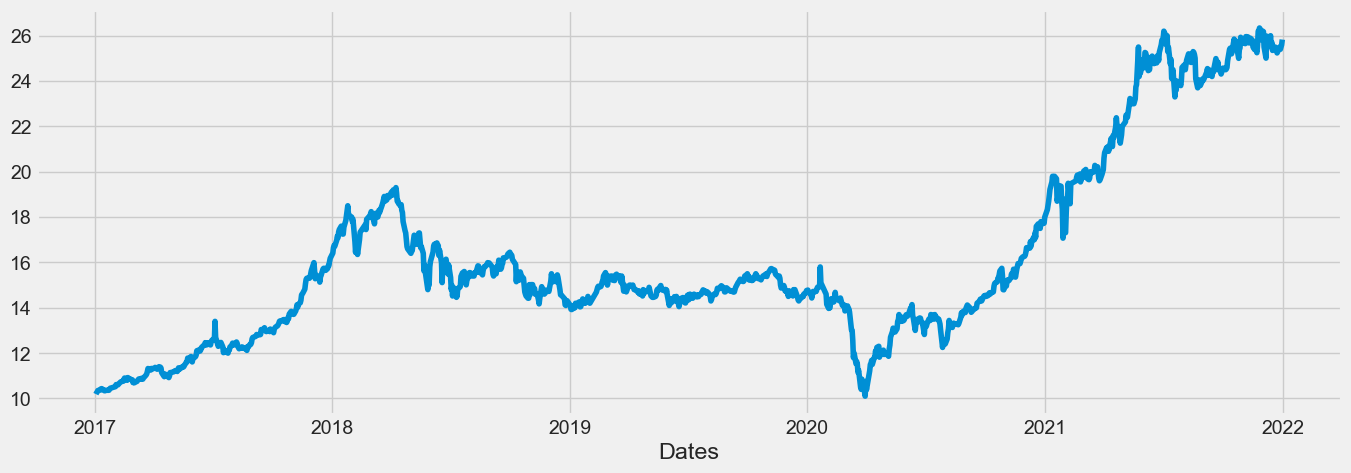

In [209]:
series_E1VFVN30.groupby("Dates").mean()['close'].plot()
plt.title("The chart shows the average closing price by days ",fontsize=15)

- Closing Price By Month

AttributeError: module 'matplotlib' has no attribute 'title'

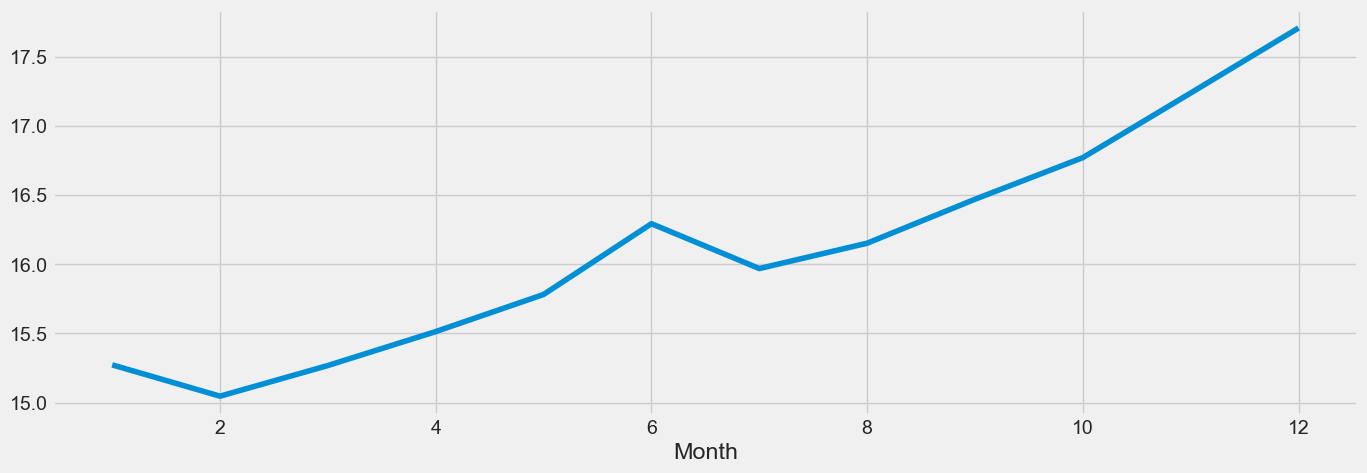

In [210]:
series_E1VFVN30.groupby("Month").mean()['close'].plot()
plt.title("The chart shows the average closing price by month ",fontsize=15)

- Closing Price By Year

AttributeError: module 'matplotlib' has no attribute 'title'

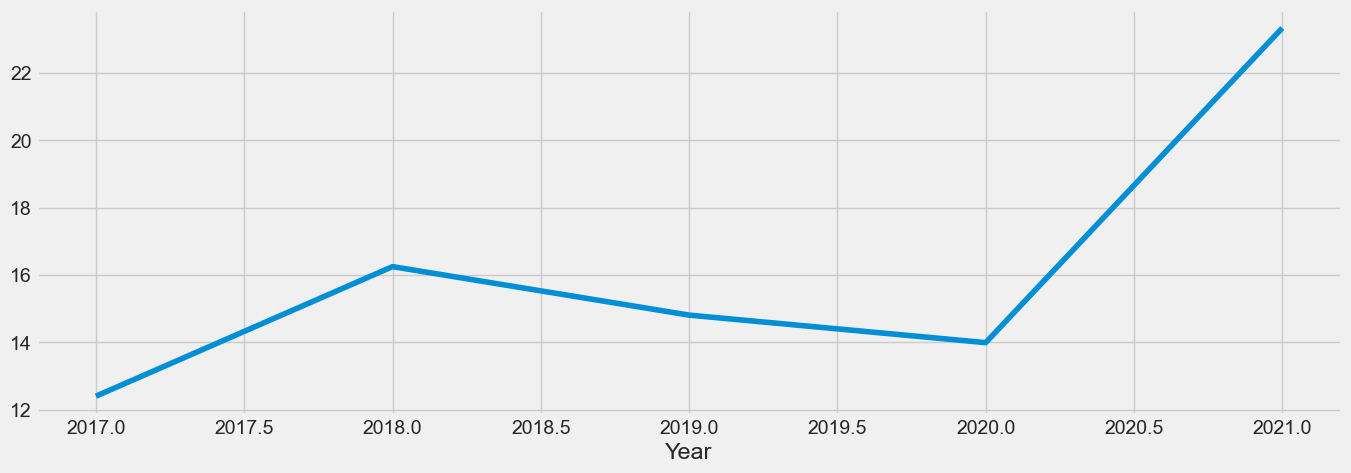

In [211]:
series_E1VFVN30.groupby("Year").mean()['close'].plot()
plt.title("The chart shows the average closing price by year",fontsize=15)

**Average closing price of the company FUCTVGF3**

In [212]:
series_FUCTVGF3 = series_1[series_1.code =="FUCTVGF3"]

- Closing Price By Days

AttributeError: module 'matplotlib' has no attribute 'title'

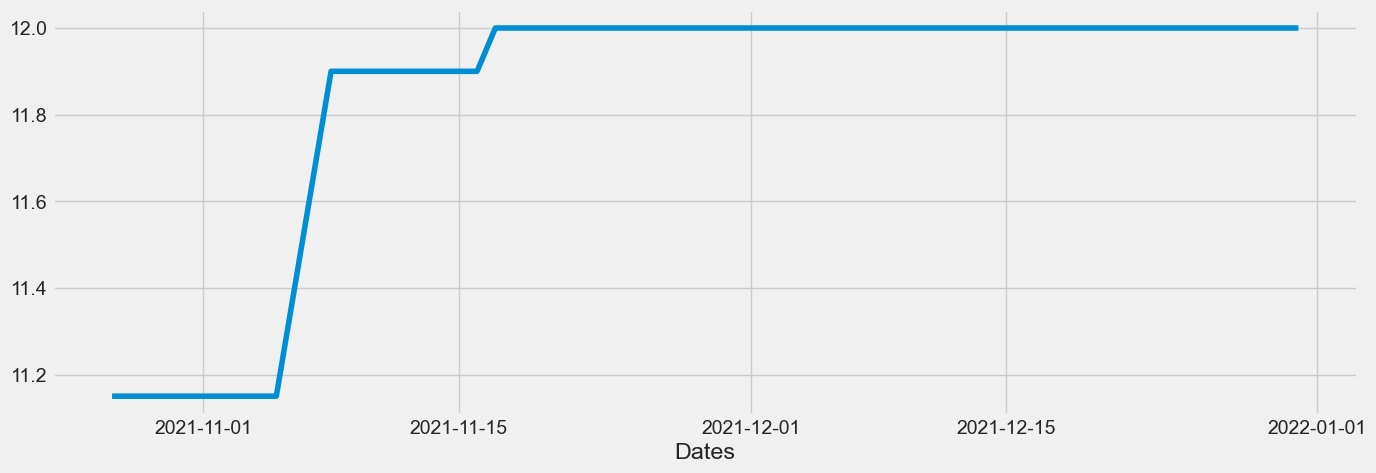

In [213]:
series_FUCTVGF3.groupby("Dates").mean()['close'].plot()
plt.title("The chart shows the average closing price by days ",fontsize=15)

- Closing Price By Month

AttributeError: module 'matplotlib' has no attribute 'title'

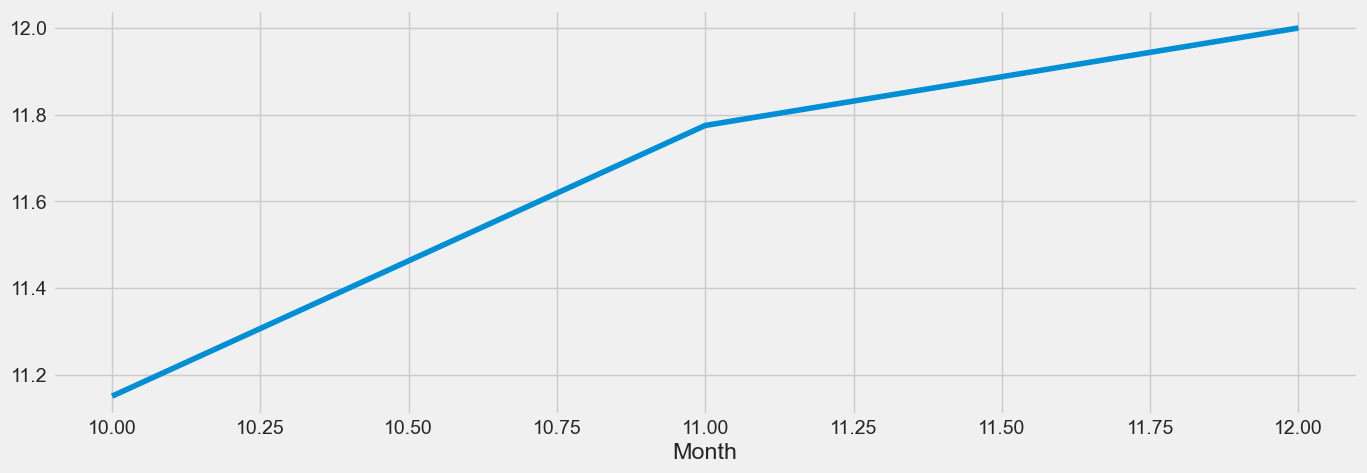

In [214]:
series_FUCTVGF3.groupby("Month").mean()['close'].plot()
plt.title("The chart shows the average closing price by month ",fontsize=15)

- Closing Price By Year

AttributeError: module 'matplotlib' has no attribute 'title'

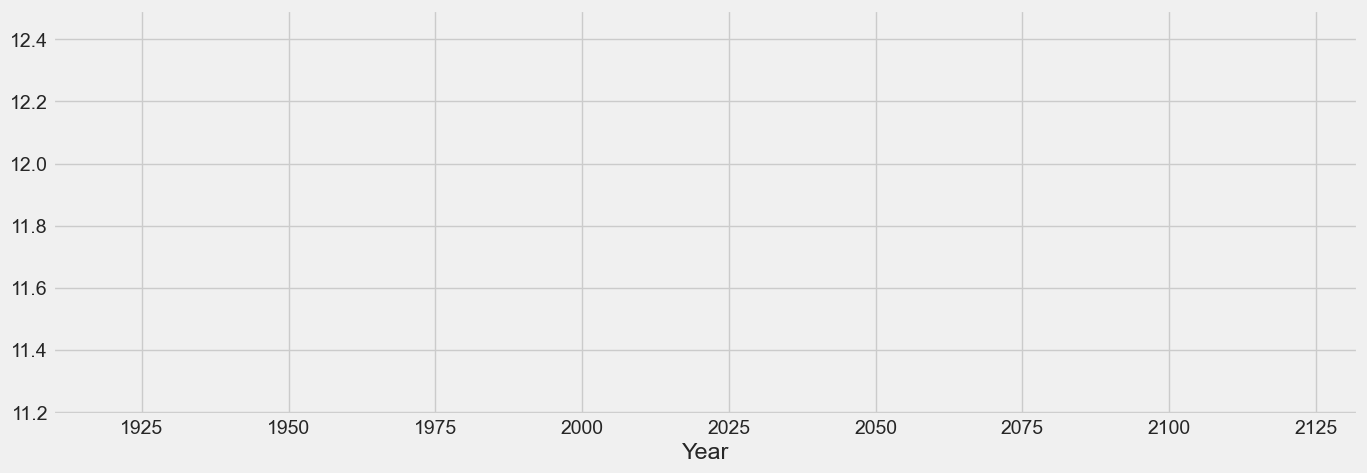

In [215]:
series_FUCTVGF3.groupby("Year").mean()['close'].plot()
plt.title("The chart shows the average closing price by month ",fontsize=15)

In [ ]:
#! pip install statsmodels
#! pip install install scikit-learn

**Table Trend Closing Price of FUESSV50**

In [259]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp =DeterministicProcess(index=series_FUESSV50.index,
                        constant=True,
                        order=2,
                        drop=True
                        )
FUESSV50=dp.in_sample()

In [260]:
FUESSV50

,const,trend,trend_squared
0,1.0,1.0,1.0
16,1.0,2.0,4.0
19,1.0,3.0,9.0
24,1.0,4.0,16.0
30,1.0,5.0,25.0
...,...,...,...
4788,1.0,1044.0,1089936.0
4792,1.0,1045.0,1092025.0
4794,1.0,1046.0,1094116.0
4795,1.0,1047.0,1096209.0


In [261]:
FUESSV50_CL= series_FUESSV50['close']
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(FUESSV50, FUESSV50_CL)
FUESSV50_CL_pred = pd.DataFrame(model.predict(FUESSV50), columns=['Trend'], index=FUESSV50.index)

**Trend_Price**

In [262]:
FUESSV50_CL_pred

,Trend
0,20.180846
16,20.155408
19,20.130012
24,20.104659
30,20.079348
...,...
4788,16.674871
4792,16.693629
4794,16.712429
4795,16.731272


**Table Trend Closing Price of FUCVREIT**


In [263]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp =DeterministicProcess(index=series_FUCVREIT.index,
                        constant=True,
                        order=2,
                        drop=True
                        )
FUCVREIT=dp.in_sample()

In [264]:
FUCVREIT

,const,trend,trend_squared
1,1.0,1.0,1.0
5,1.0,2.0,4.0
7,1.0,3.0,9.0
8,1.0,4.0,16.0
10,1.0,5.0,25.0
...,...,...,...
4783,1.0,1209.0,1461681.0
4791,1.0,1210.0,1464100.0
4796,1.0,1211.0,1466521.0
4798,1.0,1212.0,1468944.0


In [270]:
FUCVREIT_CL= series_FUCVREIT['close']
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(FUCVREIT, FUCVREIT_CL)
FUCVREIT_CL_pred = pd.DataFrame(model.predict(FUCVREIT), columns=['Trend'], index=FUCVREIT.index)

**Trend_Price**

In [271]:
FUCVREIT_CL_pred

,Trend
1,8.902522
5,8.900227
7,8.897942
8,8.895668
10,8.893404
...,...
4783,13.557080
4791,13.567091
4796,13.577113
4798,13.587144


**Table Trend Closing Price of HCM**

In [273]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp =DeterministicProcess(index=series_HCM.index,
                        constant=True,
                        order=2,
                        drop=True
                        )
HCM=dp.in_sample()

In [274]:
HCM

,const,trend,trend_squared
2,1.0,1.0,1.0
9,1.0,2.0,4.0
17,1.0,3.0,9.0
20,1.0,4.0,16.0
23,1.0,5.0,25.0
...,...,...,...
4769,1.0,1243.0,1545049.0
4779,1.0,1244.0,1547536.0
4780,1.0,1245.0,1550025.0
4786,1.0,1246.0,1552516.0


In [275]:
HCM_CL= series_HCM['close']
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(HCM,HCM_CL)
HCM_CL_pred = pd.DataFrame(model.predict(HCM), columns=['Trend'], index=HCM.index)

**Trend_Price**

In [276]:
HCM_CL_pred

,Trend
2,30.349632
9,30.354989
17,30.360364
20,30.365756
23,30.371166
...,...
4769,50.556382
4779,50.583582
4780,50.610799
4786,50.638034


**Table Trend Closing Price of E1VFVN30**

In [281]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp =DeterministicProcess(index=series_E1VFVN30.index,
                        constant=True,
                        order=2,
                        drop=True
                        )
E1VFVN30=dp.in_sample()

In [282]:
E1VFVN30

,const,trend,trend_squared
3,1.0,1.0,1.0
6,1.0,2.0,4.0
12,1.0,3.0,9.0
21,1.0,4.0,16.0
28,1.0,5.0,25.0
...,...,...,...
4789,1.0,1243.0,1545049.0
4793,1.0,1244.0,1547536.0
4800,1.0,1245.0,1550025.0
4801,1.0,1246.0,1552516.0


In [283]:
E1VFVN30_CL= series_E1VFVN30['close']
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(E1VFVN30,E1VFVN30_CL)
FUCTVGF3_CL_pred = pd.DataFrame(model.predict(E1VFVN30), columns=['Trend'], index=E1VFVN30.index)

**Trend_Price**

In [284]:
FUCTVGF3_CL_pred

,Trend
3,21.791847
6,21.771915
12,21.752010
21,21.732131
28,21.712278
...,...
4789,17.255132
4793,17.267785
4800,17.280463
4801,17.293168


**Table Trend Closing Price of FUCTVGF3**

In [278]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp =DeterministicProcess(index=series_FUCTVGF3.index,
                        constant=True,
                        order=2,
                        drop=True
                        )
FUCTVGF3=dp.in_sample()


In [279]:
FUCTVGF3

,const,trend,trend_squared
4,1.0,1.0,1.0
11,1.0,2.0,4.0
13,1.0,3.0,9.0
14,1.0,4.0,16.0
15,1.0,5.0,25.0
18,1.0,6.0,36.0
22,1.0,7.0,49.0
29,1.0,8.0,64.0
32,1.0,9.0,81.0
35,1.0,10.0,100.0


In [280]:
FUCTVGF3_CL= series_FUCTVGF3['close']
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(FUCTVGF3,FUCTVGF3_CL)
FUCTVGF3_CL_pred = pd.DataFrame(model.predict(FUCTVGF3), columns=['Trend'], index=FUCTVGF3.index)

**Trend_Price**

In [249]:
FUCTVGF3_CL_pred

,Trend
4,11.890791
11,11.890908
13,11.890887
14,11.890728
15,11.890431
18,11.889995
22,11.889421
29,11.888709
32,11.887859
35,11.886871


<h3 id="2. Seasonal and nonseasonal cycles">2. Seasonal and nonseasonal cycles</h3>

**Seasonal**
A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency. The monthly sales of antidiabetic drugs above shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.

**Cyclic**
A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.